# Stock Price Prediction

*Predicting stock price using a logistic regression model based on the data in the last four years.*

**Importing required libraries**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

**Importing Dataset**

In [26]:
df = pd.read_csv('1767133-1729258-1613615-Stock_Price_data_set_(1).csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [27]:
df.shape

(1009, 7)

In [28]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


**Plotting the closing price of the stock**

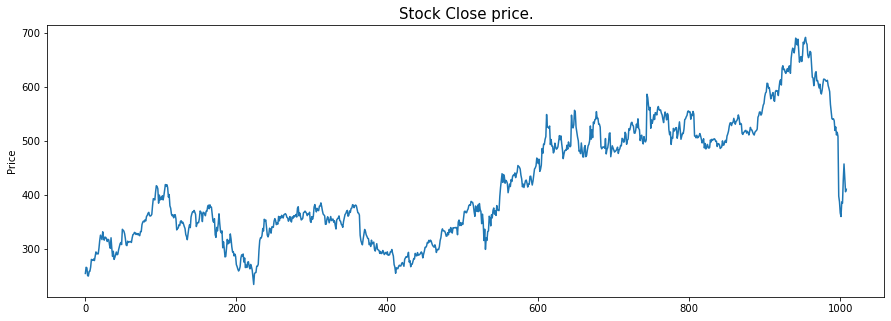

In [30]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Stock Close price.', fontsize=15)
plt.ylabel('Price')
plt.show()

In [31]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


**Data in the 'Close' column and 'Adj Close' column look to be the same. Lets check if they are same for all the rows in the dataset**

In [32]:
df[df['Close'] == df['Adj Close']].shape

(1009, 7)

**We can remove one of the columns as they are the same for all the rows**

In [33]:
df = df.drop(['Adj Close'], axis=1)

**Lets check if there are any null values in the dataset**

In [34]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

**Distribution Plot of the data**

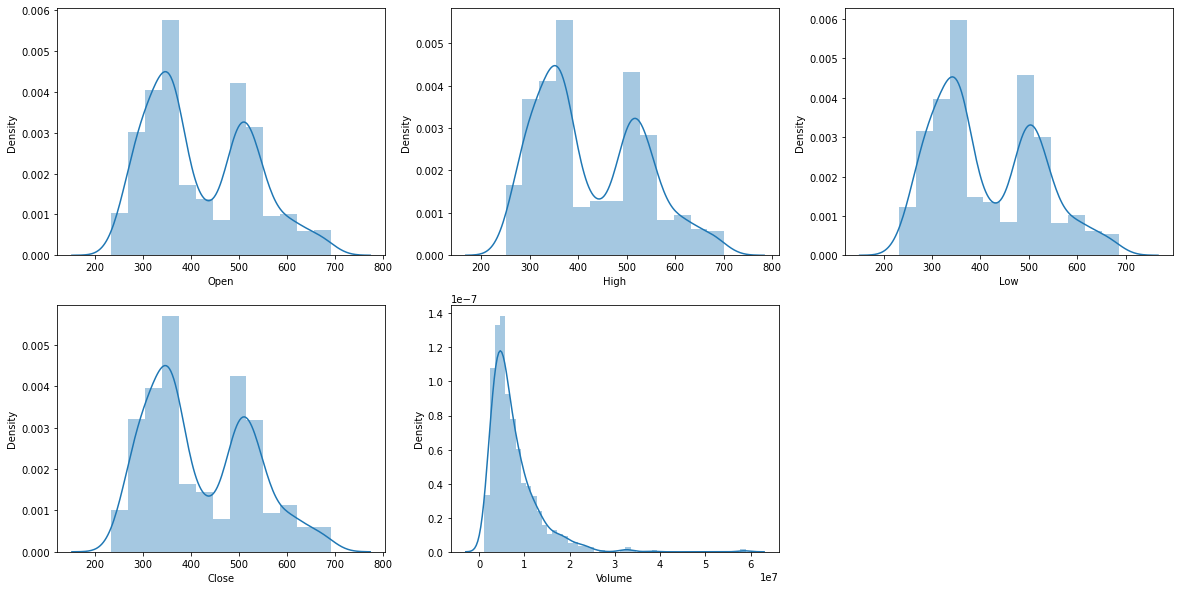

In [35]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

**Boxplot**

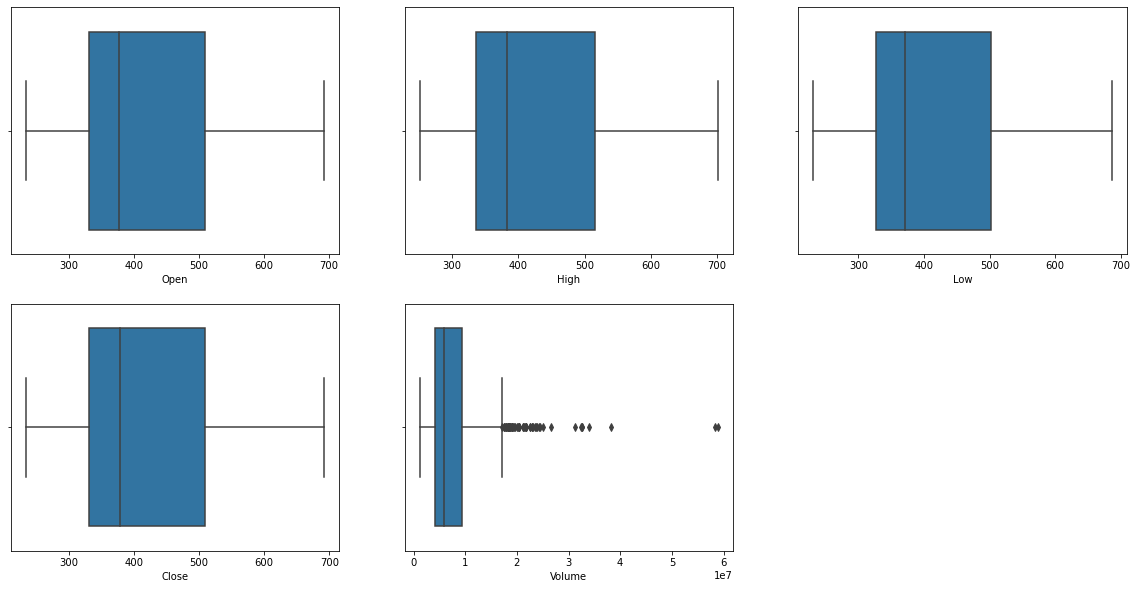

In [36]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

*Observation : From the above boxplots, we can see only volume column is having outliers and rest of the columns are free form outliers*

**Splitting the Date column**

In [37]:
splitted = df['Date'].str.split('-', expand=True)
 
df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')
 
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,2018,2,5
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,2018,2,6
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,2018,2,7
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,2018,2,8
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,2018,2,9


**Quarterly results can have an impact on stock price, so adding a column to check for quarter end**

In [38]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,2018,2,5,0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,2018,2,6,0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,2018,2,7,0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,2018,2,8,0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,2018,2,9,0


**Plotting bar graph after grouping the data by year**

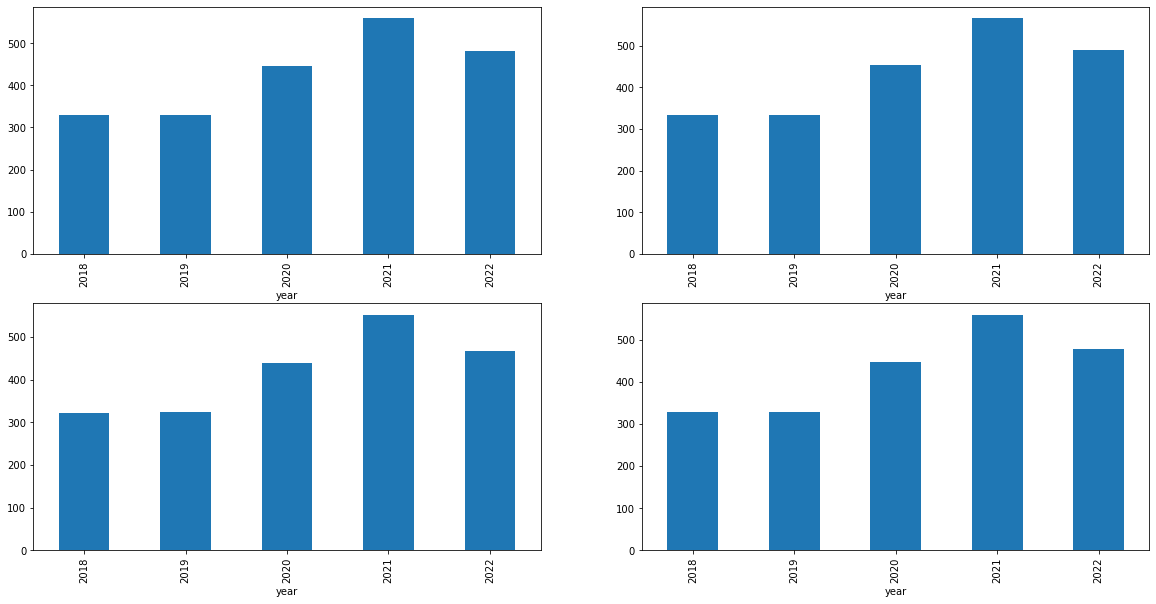

In [39]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

*Observation: From the above graph, we can conclude that the stock price increased the most in the years 2020 and 2021*

In [40]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,year,month,day
is_quarter_end,,,,,,,,
0,418.681368,424.889821,412.112068,418.699791,7.951664e+06,2019.622024,6.087798,15.715774
1,419.814037,426.179910,412.896440,419.600831,6.810988e+06,2019.543027,7.442136,15.721068


*Observation : Prices are a bit higher in the months of quarter end and the volumes are lower*

**Adding few more columns which will help the model and adding the target feature which is a signal of buy or not**

In [41]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end,open-close,low-high,target
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,2018,2,5,0,7.740005,-17.869995,1
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,2018,2,6,0,-18.020004,-21.700012,0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,2018,2,7,0,2.019989,-8.120025,0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,2018,2,8,0,16.979981,-17.619995,0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,2018,2,9,0,4.380005,-19.690002,1


**Lets check whether the target is balanced or not using a pie chart**

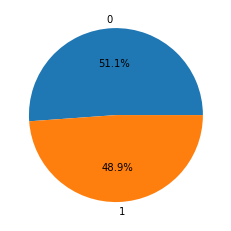

In [42]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

**Lets plot a heatmap to see if any of the features are correlated**

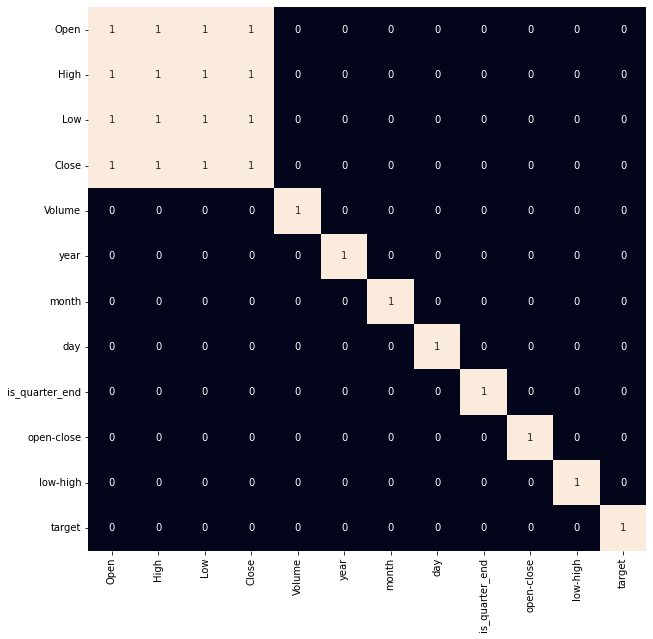

In [43]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

*Observation: From the above heatmap, we can see there is a high correlation between Open, High, Low and Close columns which is expected but none of the newly added features seem to be correlated*

**Selecting the features to train the model and splitting the data into training and validation datasets in a 90/10 ratio and also normalizing the data**

In [44]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(908, 3) (101, 3)


**Training the Logistic regression model**

In [45]:
model = LogisticRegression()
 
model.fit(X_train, Y_train)

print(f'{model} : ')
print('Training Accuracy : ', metrics.roc_auc_score(
Y_train, model.predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(
Y_valid, model.predict_proba(X_valid)[:,1]))
print()

LogisticRegression() : 
Training Accuracy :  0.5406138368447911
Validation Accuracy :  0.582598235765838



**Plotting confusion matrix for the validation data**

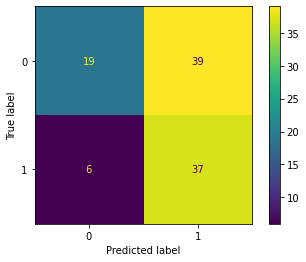

In [46]:
metrics.plot_confusion_matrix(model, X_valid, Y_valid)
plt.show()

## Conclusion:

*We can observe that the model accuracy is not much better than simply guessing with a 50 percent probabilty which might be due to complex nature of the data.*